In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Business Problem - 1

# Importing the data file

In [2]:
loan=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/4. Basic Statistics - Hypothesis Testing/LoansData.csv')

In [3]:
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


# Data Cleaning

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [5]:
loan.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [6]:
# Changing the data types of interest rat column to float and removing % sign
loan['Interest.Rate']=loan['Interest.Rate'].str.replace('%','')

loan['Interest.Rate']=pd.to_numeric(loan['Interest.Rate'])

In [7]:
loan['Interest.Rate'].isna().sum()

2

In [8]:
# replacing the null values with mean interest rate
loan['Interest.Rate'].fillna(loan['Interest.Rate'].mean(), inplace=True)

In [9]:
loan['Interest.Rate'].isna().sum()

0

In [10]:
# filling the null values in loan amount requested with mean loan amount

loan['Amount.Requested'].fillna(loan['Amount.Requested'].mean(), inplace=True)

# a. Intrest rate is varied for different loan amounts (Less interest charged for high loan amounts)

In [11]:
# Defining the hypothesis
# Ho:- Interest rate does not vary with different loan amounts
# Ha:- Interest rate varies with different loan amounts

# Confidence Level: 95%
# significance: 5%

# Method to use: pearson correlation coefficient

In [12]:
stats.pearsonr(loan['Interest.Rate'], loan['Amount.Requested'])

PearsonRResult(statistic=0.33244640596656916, pvalue=1.4148683739770683e-65)

In [13]:
# since the p-value is very low, we reject the null hypothesis.
# which show that interest rate varies for different loan amounts.
# Less interest charged for high loan amount.

# b. Loan length is directly effecting intrest rate.

In [14]:
loan['Loan.Length'].unique()

array(['36 months', '60 months'], dtype=object)

In [15]:
# Seperating the interest rate based on the two type of loan length
month36=loan.loc[loan['Loan.Length']=='36 months', 'Interest.Rate']
month60=loan.loc[loan['Loan.Length']=='60 months', 'Interest.Rate']

In [16]:
# defining the null and alternative hypothesis
# Ho:- Loan length does not affect the interest rate.
# Ha:- Loan lebgth affects the interest rate.

# confidence level: 95%

# significance: 5%

# Method used: t-test (individual sample)

In [17]:
stats.ttest_ind(month36,month60)

TtestResult(statistic=-23.41049023613487, pvalue=9.549596064332559e-110, df=2498.0)

In [18]:
# Since p- value is outside the confidence region, we reject the null hyothesis.
# which implies that Loan length is directly affecting the interest rate.

# c. Interest rate varies for different purpose of loans

In [19]:
loan['Loan.Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [20]:
# Define the hypothesis conditions
# Ho:- Interest rate does not vary for different purpose of loans
# Ha:- Interest rate varies for different purpose of loans.

# confidence level: 95%

# significance: 5%

In [21]:
# we will use spearman rank method as we need to find relationship between continuous and categorical variables
stats.spearmanr(loan['Interest.Rate'], loan['Loan.Purpose'])

SignificanceResult(statistic=-0.06035663579266386, pvalue=0.0025354766301471797)

In [22]:
# since p-value is outside the confidence region, we reject the null hypothesis.
# Interest rate varies for different purpose of loans

# d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2500 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2500 non-null   float64
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [24]:
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [25]:
# since we need relationship between two categorical variables
# we will use Chi Square test for the hypothesis

In [26]:
# Defining the hypothesis test conditions

# Ho:- There is no relationship between Home Ownership and Fico Score
# Ha:- There is relationship between Home Ownership and Fico Score.

# Confidence Level: 95%

# Significance Level: 5%

In [27]:
observed=pd.crosstab(loan['Home.Ownership'], loan['FICO.Range'])
observed

FICO.Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home.Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,67,79,55,61,...,21,12,15,7,7,6,5,6,0,1
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,90,75,91,65,...,4,5,4,5,2,3,2,0,0,0


In [28]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=473.0524636834602, pvalue=1.202159201024428e-35, dof=148, expected_freq=array([[2.29475370e+00, 1.37685222e+00, 4.58950741e-01, 1.83580296e+00,
        5.73688426e+01, 6.65478574e+01, 7.84805767e+01, 7.61858230e+01,
        7.20552663e+01, 6.24173008e+01, 6.42531037e+01, 7.02194634e+01,
        6.01225471e+01, 6.14993993e+01, 5.09435322e+01, 4.26824189e+01,
        5.23203845e+01, 4.31413696e+01, 4.31413696e+01, 2.98317982e+01,
        2.43243893e+01, 2.47833400e+01, 2.79959952e+01, 2.11117341e+01,
        2.11117341e+01, 1.65222267e+01, 7.80216260e+00, 1.00969163e+01,
        1.28506207e+01, 8.72006408e+00, 9.17901482e+00, 5.96635963e+00,
        5.96635963e+00, 5.04845815e+00, 3.67160593e+00, 2.75370445e+00,
        4.58950741e-01, 4.58950741e-01],
       [2.00240288e-03, 1.20144173e-03, 4.00480577e-04, 1.60192231e-03,
        5.00600721e-02, 5.80696836e-02, 6.84821786e-02, 6.64797757e-02,
        6.28754505e-02, 5.44653584e-02, 5.60672807e-02, 6.12735

In [29]:
# Since p-value is outside the confidence region, we reject null hypothesis.
# There is a relationship between Home Ownership and FICO Score.

# Business Problem - 2

In [30]:
# Importing the data file
price=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/4. Basic Statistics - Hypothesis Testing/Price_Quotes.csv')

In [31]:
price.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


# If there is any any difference in the average price quotes provided by Mary and Barry?

In [32]:
price.isna().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

In [33]:
# defining the hypothesis conditions
# Ho:- There is no difference in price quotes provided by Barry and Mary
# Ha:- There is difference in price quotes provided by Barry and Mary

# confidence level: 95%

# Significance: 5%

# Method to use: T-test_rel for related sample and size -12

In [34]:
stats.ttest_rel(price.Mary_Price, price.Barry_Price)

TtestResult(statistic=-2.5213765108923494, pvalue=0.02840588045242053, df=11)

In [35]:
# Since p-value is outside the confidence region, we reject null hypothesis.
# There is difference in price quotes provided by Barry and Mary

# Business Problem - 3

In [36]:
# importing the data file
treatment_facility=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/4. Basic Statistics - Hypothesis Testing/Treatment_Facility.csv')

In [37]:
treatment_facility.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [38]:
treatment_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [39]:
treatment_facility.rename(columns={'VAR4': 'TRFF', 'VAR5':'CI'}, inplace=True)

In [40]:
treatment_facility.isna().sum()

Month                0
Reengineer           0
Employee_Turnover    0
TRFF                 0
CI                   0
dtype: int64

# Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved?

# a. effect of reengineering on incidence behavioral problems

In [41]:
prior=treatment_facility[treatment_facility.Reengineer=='Prior']['CI']
post=treatment_facility[treatment_facility.Reengineer=='Post'] ['CI']


In [42]:
# define the hypothesis conditions
# Ho:- There is no effect of reengineerig on incidence behavioral probelms
# Ha:- There is effect of reengineering on incidence behavioral problems

# Confidence: 95%

# significance: 5%

# method used: t-test 

In [43]:
stats.ttest_ind(prior, post)

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

In [44]:
# Since p-alue is inside the confidence region, we can not reject the null hypothesis.
# There is no effect of reengineering on incidence behavioral problems.

# b. effect of reengineering on Staff turn over

In [45]:
prior_turnover=treatment_facility[treatment_facility.Reengineer=='Prior']['Employee_Turnover']
post_turnover=treatment_facility[treatment_facility.Reengineer=='Post']['Employee_Turnover']

In [46]:
# Ho:- There is no effect
# Ha:- There is effect of reengineering on staff turnover

# confidence: 95%

# significance: 5%

In [47]:
stats.ttest_ind(prior_turnover, post_turnover)

TtestResult(statistic=-1.770306704753604, pvalue=0.09361109345535304, df=18.0)

In [48]:
# Since p-value is inside the confidence region, we can not reject the null hypothesis.
# therefore, there is no effect of reengineering on the staff turnover.

# Business Problem - 4

In [49]:
priority=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/4. Basic Statistics - Hypothesis Testing/Priority_Assessment.csv')

In [50]:
priority.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [51]:
priority.isna().sum()

Days        0
Priority    0
dtype: int64

In [52]:
priority.groupby('Priority').Days.count()

Priority
High      326
Low        67
Medium    249
Name: Days, dtype: int64

In [53]:
# Since there are more thn 2 groups, we will use f-oneway|ANOVA method
High=priority[priority.Priority=='High'].Days
Medium= priority[priority.Priority=='Medium'].Days
Low= priority[priority.Priority=='Low'].Days

In [54]:
# Defining the hypothesis
# Ho: Prioritzation system is not working
# Ha: Prioritization system is working

# confidence:  95%
# significance: 5%

# Method used: F-test|ANOVA

In [55]:
stats.f_oneway(High, Medium, Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [56]:
# Since p-value is inside the confidence region, we accept the null hypothesis.
# Therefore, the new prioritization system is not working.

# Business Problem - 5

In [57]:
Films=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/4. Basic Statistics - Hypothesis Testing/Films.csv')

In [58]:
Films.head(30)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
5,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,5
6,0,Ferris Buellers Day Off,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
7,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,3.0,1.0,3.0,NaN,4
8,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,3.0,1.0,3.0,NaN,4
9,0,Ferris Buellers Day Off,Female,Single,2.0,3.0,2.0,2.0,3.0,1.0,4


In [59]:
# Performing EDA
# as from the data above, there is spelling mistake in marrital status. we will correct it

Films.replace('Slngle','Single', inplace=True)


In [60]:
Films.groupby('Marital_Status').Gender.count()

Marital_Status
1           88
2          208
Married     12
Single      20
Name: Gender, dtype: int64

In [61]:
# Since we know the abbreviation used for marital_status from the information given:
# 1: Married, 2: Single, we will replace it to avoid confusion

Films.Marital_Status.replace({'1':'Married','2':'Single'}, inplace=True)

# similarly for Gender column
# 1: male, 2: Female

Films.Gender.replace({'1':'Male','2':'Female'}, inplace=True)

In [62]:
Films.groupby('Marital_Status').Gender.count()

Marital_Status
Married    100
Single     228
Name: Gender, dtype: int64

In [63]:
Films.groupby('Gender').Gender.count()

Gender
Female    213
Male      117
Name: Gender, dtype: int64

In [64]:
# checking for duplicates
Films.duplicated().sum()

51

In [65]:
# Removing the duplicate values
Films.drop_duplicates(inplace=True)

In [66]:
Films.duplicated().sum()

0

# BUSINESS PROBLEM: Use the survey resultsto addressthe following questions

# a. What is the overall level of customer satisfaction?

In [67]:
over_all=Films.groupby('Overall').Overall.count()

In [68]:
over_all

Overall
1.0    128
2.0    132
3.0     12
4.0      1
5.0      4
Name: Overall, dtype: int64

<Axes: xlabel='Overall'>

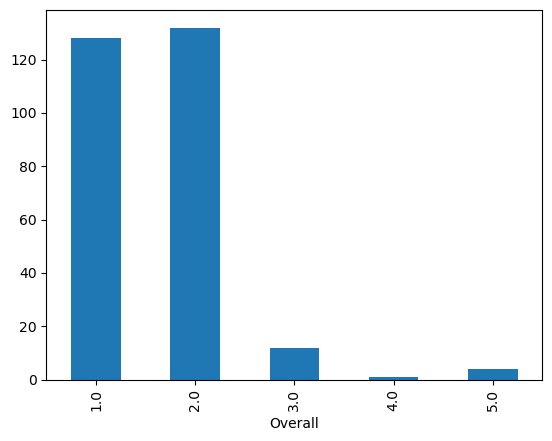

In [69]:
over_all.plot(kind='bar')

Hence, the overall customer satisfaction is either 1: Excellent or 2: Good.

# b. What factors are linked to satisfaction?

In [70]:
# Since there are three factors that might have link with overall satisfaction, we will try one by one for each factor to 
#check it's relationship with overall satisfaction.

# First, Overall with Sinage

# Ho:- There is no relationship
# Ha:- There is relationship

# confidence level: 95%
# significance: 5%

# method to use: Chi2 test

In [71]:
observation1=pd.crosstab(Films.Overall, Films.Sinage)

In [72]:
observation1

Sinage,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,69,42,12,2,2
2.0,19,85,22,4,2
3.0,0,4,8,0,0
4.0,0,0,1,0,0
5.0,1,1,1,0,1


In [73]:
stats.chi2_contingency(observation1)

Chi2ContingencyResult(statistic=91.95404780514889, pvalue=1.0905192443500657e-12, dof=16, expected_freq=array([[4.09528986e+01, 6.07391304e+01, 2.02463768e+01, 2.76086957e+00,
        2.30072464e+00],
       [4.25652174e+01, 6.31304348e+01, 2.10434783e+01, 2.86956522e+00,
        2.39130435e+00],
       [3.86956522e+00, 5.73913043e+00, 1.91304348e+00, 2.60869565e-01,
        2.17391304e-01],
       [3.22463768e-01, 4.78260870e-01, 1.59420290e-01, 2.17391304e-02,
        1.81159420e-02],
       [1.28985507e+00, 1.91304348e+00, 6.37681159e-01, 8.69565217e-02,
        7.24637681e-02]]))

In [74]:
# Since p-value is outside the confidence region, we reject the null hypothesis.
# Therefore, There is a relationship between overall and Sinage.

In [75]:
# Now for second factor, Overall and Cleaning
# Ho:- There is no relationship 
# Ha:- There is relationship

# Confidence: 95%
# Significance: 5%

# method: chi2 test

In [76]:
observation2=pd.crosstab(Films.Overall, Films.Clean)

In [77]:
observation2

Clean,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,82,39,5,1,1
2.0,32,82,14,3,0
3.0,3,5,4,0,0
4.0,0,1,0,0,0
5.0,2,1,0,0,1


In [78]:
stats.chi2_contingency(observation2)

Chi2ContingencyResult(statistic=88.6676504071631, pvalue=4.399087983774725e-12, dof=16, expected_freq=array([[5.51884058e+01, 5.93623188e+01, 1.06666667e+01, 1.85507246e+00,
        9.27536232e-01],
       [5.64818841e+01, 6.07536232e+01, 1.09166667e+01, 1.89855072e+00,
        9.49275362e-01],
       [5.17391304e+00, 5.56521739e+00, 1.00000000e+00, 1.73913043e-01,
        8.69565217e-02],
       [4.31159420e-01, 4.63768116e-01, 8.33333333e-02, 1.44927536e-02,
        7.24637681e-03],
       [1.72463768e+00, 1.85507246e+00, 3.33333333e-01, 5.79710145e-02,
        2.89855072e-02]]))

In [79]:
# Since p-value is outside the confidence region, we reject the null hypothesis
# Therefore, there is a relationshi between clean and overall.

In [80]:
# Now for the final factor, Overall and Parking
# Ho:- There is no relationship
# Ha:- There is relationship 

# confidence: 95%
# significance: 5%

# method: chi2 test

In [81]:
observation3=pd.crosstab(Films.Overall, Films.Parking)

In [82]:
stats.chi2_contingency(observation3)

Chi2ContingencyResult(statistic=175.1310290555826, pvalue=7.950772886000052e-29, dof=16, expected_freq=array([[5.10144928e+01, 5.88985507e+01, 1.29855072e+01, 3.24637681e+00,
        1.85507246e+00],
       [5.22101449e+01, 6.02789855e+01, 1.32898551e+01, 3.32246377e+00,
        1.89855072e+00],
       [4.78260870e+00, 5.52173913e+00, 1.21739130e+00, 3.04347826e-01,
        1.73913043e-01],
       [3.98550725e-01, 4.60144928e-01, 1.01449275e-01, 2.53623188e-02,
        1.44927536e-02],
       [1.59420290e+00, 1.84057971e+00, 4.05797101e-01, 1.01449275e-01,
        5.79710145e-02]]))

In [83]:
# Since p-value is outside the confidence region, we reject the null hypothesis.
# Therefore, there is a relationship between overall and parking.

# Therefore, all the 3 factors Sinage, Clean and Parking have a relationship with overall satisfaction.

# c. What is the demographic profile of Film on the Rocks patrons?

In [84]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [87]:
# To check how may males and females are attendig the theatre to watch Film on the Rock patrons
Films.groupby('Gender').Gender.count()

Gender
Female    176
Male      103
Name: Gender, dtype: int64

In [90]:
# percentage of males and females atteded the theatre
male_per=103*100/(103+176)
female_per=176*100/(103+176)

print(" percentage of males:{} % ".format(round(male_per,2)))
print("Percentage of Females: {} %".format(round(female_per,2)))

 percentage of males:36.92 % 
Percentage of Females: 63.08 %


In [91]:
# Now to check how many customers are Single and how many are married?
Films.groupby('Marital_Status').Marital_Status.count()

Marital_Status
Married     88
Single     189
Name: Marital_Status, dtype: int64

In [92]:
# Now to check what is the income slot of most of the customers who came to watch Film on the rock patrons?
# 1: income less than $ 50,000
# 2: income between $50,000 to $100,000
# 3. income more than $ 100,000

Films.groupby('Income').Income.count()

Income
1.0    115
2.0     74
3.0     76
Name: Income, dtype: int64

In [101]:
# Now checking the age group of customers
# 1: 1-12
# 2: 13-30
# 3: 31-60
# 4: 60+

age=Films.groupby('Age').Age.count()

<Axes: xlabel='Age'>

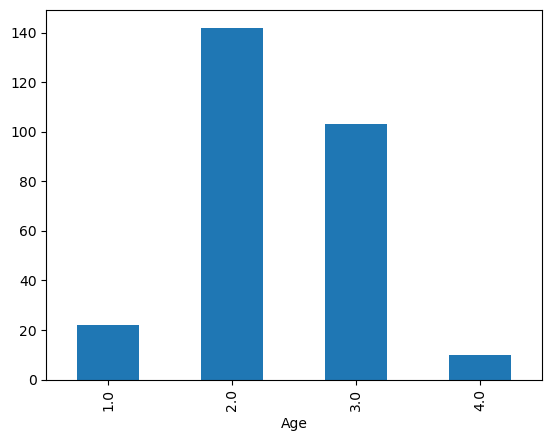

In [100]:
age.plot(kind='bar')

# From above data, we can infer that:

# 1. Female customers are more enthusiast about Film on Rock patrons.

# 2. Most of the customers who watched Film on Rock patrons are Single.

# 3. Most of the customers who came to watch Film on Rock patrons have income less than $50,000
# 4. Most of the customers are amoung the Youth of age group 13-30.

--

#  d. In what media outlet(s) should the film series be advertised?

In [93]:
# Now to understand which media outlet is spreading more news about the Film on the rock patrons.

Films.groupby('Hear_About').Hear_About.count()

Hear_About
1       22
1,5      1
2       12
2,5      2
3       12
3,4      2
3,5      1
4       38
4,5      1
5      180
5,4      1
Name: Hear_About, dtype: int64

In [94]:
# Since most of the 2 pair slot contain 5 as option, lets just change it to 5 instead.

Films.replace({'1,5':'5','2,5':'5','3,5':'5','4,5':'5','3,4':'4','5,4':'5'}, inplace=True)

In [96]:
Hear_about=Films.groupby('Hear_About').Hear_About.count()

<Axes: ylabel='Hear_About'>

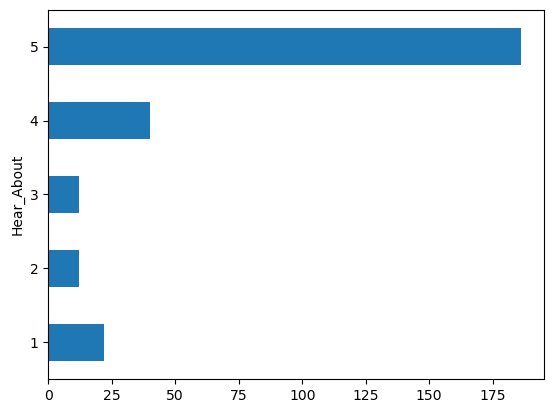

In [105]:
Hear_about.plot(kind='barh')

From above graph we can say that most of the customers who came to watch FIlm on Rock patrons heard about it through word of mouth.

# Since most people heard about Film on Rock patrons through word of mouth but this is not a media outlet, therefore we will choose the second most used media oulet to advertise the film series:

# Ans: Website

# Use website to advertise film series on Rock patrons.

# Thank you!